In [50]:
import os        
import clr
import System
import pandas as pd

filepaths = []
filePath = "D:\OTARank\OTARank"
for path, subdirs, files in os.walk(filePath):
    for filename in [s for s in files if 'mergerrank' in s.lower()]:
        filepaths.append(os.path.join(filePath,path,filename))
print len(filepaths)
filepaths = sorted(list(set(filepaths)))
print len(filepaths)

5278
5278


In [127]:
data_list = []
#requires pythonnet installed -> pip install pythonnet 
clr.AddReference("BinaryToJson/Common.Utility.DL.BO") # usually requires dll to be within directory
clr.AddReference('System.Runtime.Serialization')
clr.AddReference('System.IO')

from System.Runtime.Serialization.Formatters.Binary import BinaryFormatter
from System.IO import FileStream,FileMode,FileAccess,FileShare

z= None
for filepath in filepaths[:10]:
    serializer = BinaryFormatter()
    reader = FileStream(filepath, FileMode.Open, FileAccess.Read, FileShare.None)
    data = serializer.Deserialize(reader)
    reader.Close()
    for x in data.GetEnumerator():
        data_list.append((x.get_CheckInDate(),x.get_ChannelName(),x.get_PropertyID(),
                          x.get_IntermediateProperty(),x.get_Price().ToString(),x.get_PropertyName(),
                         x.get_SID()))
df = pd.DataFrame(data_list,columns=['checkin','channel','prop_id','inte_prop','price','name','sid'])
df.head()

,checkin,channel,prop_id,inte_prop,price,name,sid
0,4/1/2017 12:00:00 AM,Booking.com,246435,Sub,81.002,Copthorne Hotel London Gatwick,10007
1,4/1/2017 12:00:00 AM,Booking.com,217221,NA,37.694,Holiday Inn London Gatwick - Worth,10007
2,4/1/2017 12:00:00 AM,Booking.com,233456,NA,47.318,Ramada Crawley-Gatwick,10007
3,4/1/2017 12:00:00 AM,Booking.com,238943,NA,55.338,Sandman Signature London Gatwick,10007
4,4/1/2017 12:00:00 AM,Booking.com,208924,NA,61.754,Premier Inn London Gatwick Airport (Manor Royal),10007


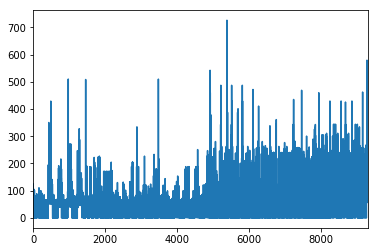

In [129]:
import matplotlib as plt
import pandas as pd
%matplotlib inline

df['price'] = pd.to_numeric(df['price'])
df['channel'] = df['channel'].astype('str')
df['name'] = df['name'].astype(unicode)
df['price'].plot()

In [130]:
df.dtypes

checkin       object
channel       object
prop_id        int64
inte_prop     object
price        float64
name          object
sid            int64
dtype: object

In [66]:
sorted(filepaths)
filepaths.index('D:\\OTARank\\OTARank\\20\\2017\\Apr\\Mergerrank_Apr')

2871

In [67]:
filepaths[2871:2879]

['D:\\OTARank\\OTARank\\20\\2017\\Apr\\Mergerrank_Apr',
 'D:\\OTARank\\OTARank\\20\\2017\\Feb\\Mergerrank_Feb',
 'D:\\OTARank\\OTARank\\20\\2017\\Jan\\Mergerrank_Jan',
 'D:\\OTARank\\OTARank\\20\\2017\\Jun\\Mergerrank_Jun',
 'D:\\OTARank\\OTARank\\20\\2017\\Mar\\Mergerrank_Mar',
 'D:\\OTARank\\OTARank\\20\\2017\\May\\Mergerrank_May',
 'D:\\OTARank\\OTARank\\2108\\2017\\Apr\\Mergerrank_Apr',
 'D:\\OTARank\\OTARank\\2108\\2017\\Feb\\Mergerrank_Feb']